This code is derived from code at:

https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb


In [847]:
import json
import requests
import numpy as np
import pandas as pd

The following strings represent the HTTP endpoints for the two REST APIs that we'll use.

The parameters for the APIs are encoded in these strings and are represented below by the URL segments that are in braces, such as `{granularity}`. These are placeholders that are replaced by values that we specify in blocks of JSON and pass into the function that makes the API call. (That function is defined later in this file.)

In [848]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

In this section, we specify blocks of JSON that contain the parameters for each of the **five** API calls that we make.

The first **three** parameter blocks are for the Pageviews API. The following **two** parameter blocks are for the Pagecount (legacy) API.

In [849]:
#
# Parameters for getting aggregated current standard pageview data
#
# See: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
#
params_pageviews_desktop = {
                    "project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

params_pageviews_mobile_web = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

params_pageviews_mobile_app = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

#
# Parameters for getting aggregated legacy view data 
#
# See: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
#
params_pagecounts_legacy_desktop = {
                 "project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

params_pagecounts_legacy_mobile = {
                 "project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }


In [850]:
#
# Identify myself in the headers of the HTTP request
#
headers = {
    'User-Agent': 'https://github.com/carljparker',
    'From': 'cajopa@uw.edu'
}

In [851]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

## Extract pageview data for desktop site ##

In [852]:
pageviews_desktop = api_call(endpoint_pageviews, params_pageviews)

The REST API returns a Python dictionary with a single key, `items`.

In [853]:
type( pageviews_desktop )

dict

In [854]:
type( pageviews_desktop['items'] )

list

Write the JSON data to an external file.

In [855]:
with open("pageviews_desktop_201507-202009.json", "w") as write_file:
    json.dump(pageviews_desktop, write_file)

Read the JSON data into a Pandas dataframe.

In [856]:
df_pageviews_desktop = pandas.read_json( json.dumps( pageviews_desktop[ 'items' ] ), orient='records', convert_dates = False )

In [857]:
df_pageviews_desktop

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220
...,...,...,...,...,...,...
58,en.wikipedia,desktop,user,monthly,2020050100,3078093615
59,en.wikipedia,desktop,user,monthly,2020060100,2721328557
60,en.wikipedia,desktop,user,monthly,2020070100,2638936132
61,en.wikipedia,desktop,user,monthly,2020080100,2613058239


Remove the following columns: `project` (0), `access` (1), `agent` (2), `granularity` (3). The project and granularity are the same for all the data that we retrieved. The agent value isn't necessary for the analysis, but was only important when specifying to the REST API which data to retrieve. We'll rename the `views` column to specify the access type.

In [858]:
df_pageviews_desktop.drop( df_pageviews_desktop.columns[ [ 0, 1, 2, 3 ] ], axis = 1, inplace = True )

In [859]:
df_pageviews_desktop

,timestamp,views
0,2015070100,4376666686
1,2015080100,4332482183
2,2015090100,4485491704
3,2015100100,4477532755
4,2015110100,4287720220
...,...,...
58,2020050100,3078093615
59,2020060100,2721328557
60,2020070100,2638936132
61,2020080100,2613058239


Rename views to the access type: desktop.

In [860]:
df_pageviews_desktop.columns = [ 'timestamp', 'pageview_desktop_views' ]

In [861]:
df_pageviews_desktop

,timestamp,pageview_desktop_views
0,2015070100,4376666686
1,2015080100,4332482183
2,2015090100,4485491704
3,2015100100,4477532755
4,2015110100,4287720220
...,...,...
58,2020050100,3078093615
59,2020060100,2721328557
60,2020070100,2638936132
61,2020080100,2613058239


## Extract pageview data for mobile web ##

In [862]:
pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

Write the JSON data to an external file.

In [863]:
with open("pageviews_mobile-web_201507-202009.json", "w") as write_file:
    json.dump(pageviews_mobile_web, write_file)

Read the JSON data into a Pandas dataframe.

In [864]:
df_pageviews_mobile_web = pandas.read_json( json.dumps( pageviews_mobile_web[ 'items' ] ), orient='records', convert_dates = False )

In [865]:
df_pageviews_mobile_web

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145
...,...,...,...,...,...,...
58,en.wikipedia,mobile-web,user,monthly,2020050100,5089055354
59,en.wikipedia,mobile-web,user,monthly,2020060100,4552042163
60,en.wikipedia,mobile-web,user,monthly,2020070100,4675166579
61,en.wikipedia,mobile-web,user,monthly,2020080100,4647875180


Remove the following columns: `project` (0), `access` (1), `agent` (2), `granularity` (3). The project and granularity are the same for all the data that we retrieved. The agent value isn't necessary for the analysis, but was only important when specifying to the REST API which data to retrieve. We'll rename the `views` column to specify the access type.

In [866]:
df_pageviews_mobile_web.drop( df_pageviews_mobile_web.columns[ [ 0, 1, 2, 3 ] ], axis = 1, inplace = True )

In [867]:
df_pageviews_mobile_web

,timestamp,views
0,2015070100,3179131148
1,2015080100,3192663889
2,2015090100,3073981649
3,2015100100,3173975355
4,2015110100,3142247145
...,...,...
58,2020050100,5089055354
59,2020060100,4552042163
60,2020070100,4675166579
61,2020080100,4647875180


Now rename the columns. It is easier when there are fewer of them.

In [868]:
df_pageviews_mobile_web.columns = [ 'timestamp', 'mobile_web' ]

In [869]:
df_pageviews_mobile_web

,timestamp,mobile_web
0,2015070100,3179131148
1,2015080100,3192663889
2,2015090100,3073981649
3,2015100100,3173975355
4,2015110100,3142247145
...,...,...
58,2020050100,5089055354
59,2020060100,4552042163
60,2020070100,4675166579
61,2020080100,4647875180


## Extract pageview data for mobile app ##

In [870]:
pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

Write the JSON data to an external file.

In [871]:
with open("pageviews_mobile-app_201507-202009.json", "w") as write_file:
    json.dump(pageviews_mobile_app, write_file)

Read the JSON data into a Pandas dataframe.

In [872]:
df_pageviews_mobile_app = pandas.read_json( json.dumps( pageviews_mobile_app[ 'items' ] ), orient='records', convert_dates = False )

In [873]:
df_pageviews_mobile_app

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,user,monthly,2015070100,109624146
1,en.wikipedia,mobile-app,user,monthly,2015080100,109669149
2,en.wikipedia,mobile-app,user,monthly,2015090100,96221684
3,en.wikipedia,mobile-app,user,monthly,2015100100,94523777
4,en.wikipedia,mobile-app,user,monthly,2015110100,94353925
...,...,...,...,...,...,...
58,en.wikipedia,mobile-app,user,monthly,2020050100,142644741
59,en.wikipedia,mobile-app,user,monthly,2020060100,21933093
60,en.wikipedia,mobile-app,user,monthly,2020070100,134547886
61,en.wikipedia,mobile-app,user,monthly,2020080100,155433481


Remove the following columns: `project` (0), `access` (1), `agent` (2), `granularity` (3). The project and granularity are the same for all the data that we retrieved. The agent value isn't necessary for the analysis, but was only important when specifying to the REST API which data to retrieve. We'll rename the `views` column to specify the access type.

In [874]:
df_pageviews_mobile_app.drop( df_pageviews_mobile_app.columns[ [ 0, 1, 2, 3 ] ], axis = 1, inplace = True )

In [875]:
df_pageviews_mobile_app

,timestamp,views
0,2015070100,109624146
1,2015080100,109669149
2,2015090100,96221684
3,2015100100,94523777
4,2015110100,94353925
...,...,...
58,2020050100,142644741
59,2020060100,21933093
60,2020070100,134547886
61,2020080100,155433481


Now rename the columns. It is easier when there are fewer of them.

In [876]:
df_pageviews_mobile_app.columns = [ 'timestamp', 'mobile_app' ]

In [877]:
df_pageviews_mobile_app

,timestamp,mobile_app
0,2015070100,109624146
1,2015080100,109669149
2,2015090100,96221684
3,2015100100,94523777
4,2015110100,94353925
...,...,...
58,2020050100,142644741
59,2020060100,21933093
60,2020070100,134547886
61,2020080100,155433481


## Merge moble pageviews (web and app) data ##

In [878]:
df_pageviews_mobile_merged = pd.merge( df_pageviews_mobile_web, df_pageviews_mobile_app, on = 'timestamp' )

In [879]:
df_pageviews_mobile_merged

,timestamp,mobile_web,mobile_app
0,2015070100,3179131148,109624146
1,2015080100,3192663889,109669149
2,2015090100,3073981649,96221684
3,2015100100,3173975355,94523777
4,2015110100,3142247145,94353925
...,...,...,...
58,2020050100,5089055354,142644741
59,2020060100,4552042163,21933093
60,2020070100,4675166579,134547886
61,2020080100,4647875180,155433481


Create a new column which is the sum of the two types of mobile page views.

In [880]:
df_pageviews_mobile_merged[ 'pageview_mobile_views' ] = df_pageviews_mobile_merged[ 'mobile_web'] + df_pageviews_mobile_merged[ 'mobile_app' ]

In [881]:
df_pageviews_mobile_merged

,timestamp,mobile_web,mobile_app,pageview_mobile_views
0,2015070100,3179131148,109624146,3288755294
1,2015080100,3192663889,109669149,3302333038
2,2015090100,3073981649,96221684,3170203333
3,2015100100,3173975355,94523777,3268499132
4,2015110100,3142247145,94353925,3236601070
...,...,...,...,...
58,2020050100,5089055354,142644741,5231700095
59,2020060100,4552042163,21933093,4573975256
60,2020070100,4675166579,134547886,4809714465
61,2020080100,4647875180,155433481,4803308661


Remove the two columns that refer to the individual types of mobile data: `mobile_web` (1) and `mobile_app` (2)

In [882]:
df_pageviews_mobile_merged.drop( df_pageviews_mobile_merged.columns[ [ 1, 2 ] ], axis = 1, inplace = True )

In [883]:
df_pageviews_mobile_merged

,timestamp,pageview_mobile_views
0,2015070100,3288755294
1,2015080100,3302333038
2,2015090100,3170203333
3,2015100100,3268499132
4,2015110100,3236601070
...,...,...
58,2020050100,5231700095
59,2020060100,4573975256
60,2020070100,4809714465
61,2020080100,4803308661


## Merge pageview data for desktop and mobile

In [884]:
df_pageviews_all_access = pd.merge( df_pageviews_mobile_merged, df_pageviews_desktop, on = 'timestamp' )

In [885]:
df_pageviews_all_access

,timestamp,pageview_mobile_views,pageview_desktop_views
0,2015070100,3288755294,4376666686
1,2015080100,3302333038,4332482183
2,2015090100,3170203333,4485491704
3,2015100100,3268499132,4477532755
4,2015110100,3236601070,4287720220
...,...,...,...
58,2020050100,5231700095,3078093615
59,2020060100,4573975256,2721328557
60,2020070100,4809714465,2638936132
61,2020080100,4803308661,2613058239


## Extract pagecount (legacy) data for desktop ##

In [886]:
pagecount_legacy_desktop = api_call(endpoint_legacy, params_pagecount_legacy_desktop)

Write the JSON data to an external file.

In [887]:
with open("pagecounts_desktop_200801-201607.json", "w") as write_file:
    json.dump(pagecount_legacy_desktop, write_file)

Read the JSON data into a Pandas dataframe.

In [888]:
df_pagecount_legacy_desktop = pandas.read_json( json.dumps( pagecount_legacy_desktop[ 'items' ] ), orient='records', convert_dates = False )

In [889]:
df_pagecount_legacy_desktop

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2008010100,4930902570
1,en.wikipedia,desktop-site,monthly,2008020100,4818393763
2,en.wikipedia,desktop-site,monthly,2008030100,4955405809
3,en.wikipedia,desktop-site,monthly,2008040100,5159162183
4,en.wikipedia,desktop-site,monthly,2008050100,5584691092
...,...,...,...,...,...
98,en.wikipedia,desktop-site,monthly,2016030100,5407676056
99,en.wikipedia,desktop-site,monthly,2016040100,5572235399
100,en.wikipedia,desktop-site,monthly,2016050100,5330532334
101,en.wikipedia,desktop-site,monthly,2016060100,4975092447


Remove the following columns: `project` (0), `access-site` (1), `granularity` (2). The project and granularity are the same for all the data that we retrieved. We'll rename the `count` column to indicate the value of access-site.

In [890]:
df_pagecount_legacy_desktop.drop( df_pagecount_legacy_desktop.columns[ [ 0, 1, 2 ] ], axis = 1, inplace = True )

In [891]:
df_pagecount_legacy_desktop.columns = [ 'timestamp', 'pagecount_desktop_views' ]

In [892]:
df_pagecount_legacy_desktop

,timestamp,pagecount_desktop_views
0,2008010100,4930902570
1,2008020100,4818393763
2,2008030100,4955405809
3,2008040100,5159162183
4,2008050100,5584691092
...,...,...
98,2016030100,5407676056
99,2016040100,5572235399
100,2016050100,5330532334
101,2016060100,4975092447


## Extract pagecount (legacy) data for mobile ##

In [893]:
pagecount_legacy_mobile = api_call(endpoint_legacy, params_pagecount_legacy_mobile)

In [894]:
with open("pagecounts_mobile_200801-201607.json", "w") as write_file:
    json.dump(pagecount_legacy_mobile, write_file)

In [895]:
df_pagecount_legacy_mobile = pandas.read_json( json.dumps( pagecount_legacy_mobile[ 'items' ] ), orient='records', convert_dates = False )

In [896]:
df_pagecount_legacy_mobile

,project,access-site,granularity,timestamp,count
0,en.wikipedia,mobile-site,monthly,2014100100,3091546685
1,en.wikipedia,mobile-site,monthly,2014110100,3027489668
2,en.wikipedia,mobile-site,monthly,2014120100,3278950021
3,en.wikipedia,mobile-site,monthly,2015010100,3485302091
4,en.wikipedia,mobile-site,monthly,2015020100,3091534479
5,en.wikipedia,mobile-site,monthly,2015030100,3330832588
6,en.wikipedia,mobile-site,monthly,2015040100,3222089917
7,en.wikipedia,mobile-site,monthly,2015050100,3334069483
8,en.wikipedia,mobile-site,monthly,2015060100,3038162463
9,en.wikipedia,mobile-site,monthly,2015070100,3254472695


Remove the following columns: `project` (0), `access-site` (1), `granularity` (2). The project and granularity are the same for all the data that we retrieved. We'll rename the `count` column to indicate the value of access-site.

In [897]:
df_pagecount_legacy_mobile.drop( df_pagecount_legacy_mobile.columns[ [ 0, 1, 2 ] ], axis = 1, inplace = True )

In [898]:
df_pagecount_legacy_mobile.columns = [ 'timestamp', 'pagecount_mobile_views' ]

In [899]:
df_pagecount_legacy_mobile

,timestamp,pagecount_mobile_views
0,2014100100,3091546685
1,2014110100,3027489668
2,2014120100,3278950021
3,2015010100,3485302091
4,2015020100,3091534479
5,2015030100,3330832588
6,2015040100,3222089917
7,2015050100,3334069483
8,2015060100,3038162463
9,2015070100,3254472695


Merge together the pagecount (legacy) data for desktop and mobile. _Perform the equivalent of an outer join, so we do not lose rows_.

In [900]:
df_pagecount_all_access = pd.merge( df_pagecount_legacy_mobile, df_pagecount_legacy_desktop, how = 'outer', on = 'timestamp' )

In [901]:
df_pagecount_all_access

,timestamp,pagecount_mobile_views,pagecount_desktop_views
0,2014100100,3.091547e+09,6577533128
1,2014110100,3.027490e+09,6153537606
2,2014120100,3.278950e+09,5830332248
3,2015010100,3.485302e+09,6103767055
4,2015020100,3.091534e+09,5602710439
...,...,...,...
98,2014050100,NaN,7543277646
99,2014060100,NaN,6577352648
100,2014070100,NaN,6761059566
101,2014080100,NaN,6687313714


## Merge pageview and pagecount (legacy) data

In [902]:
df_en_wikipedia_traffic = pd.merge( df_pageviews_all_access, df_pagecount_all_access, how = 'outer', on = 'timestamp' )

In [903]:
df_en_wikipedia_traffic

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views
0,2015070100,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09
1,2015080100,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09
2,2015090100,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09
3,2015100100,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09
4,2015110100,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09
...,...,...,...,...,...
148,2014050100,NaN,NaN,NaN,7.543278e+09
149,2014060100,NaN,NaN,NaN,6.577353e+09
150,2014070100,NaN,NaN,NaN,6.761060e+09
151,2014080100,NaN,NaN,NaN,6.687314e+09


Replace the `NaN` values with zeros.

In [904]:
df_en_wikipedia_traffic = df_en_wikipedia_traffic.fillna(0)

Create total columns

In [905]:
df_en_wikipedia_traffic[ 'pageview_all_views' ] = df_en_wikipedia_traffic[ 'pageview_mobile_views' ] + df_en_wikipedia_traffic[ 'pageview_desktop_views' ]

In [906]:
df_en_wikipedia_traffic[ 'pagecount_all_views' ] = df_en_wikipedia_traffic[ 'pagecount_mobile_views' ] + df_en_wikipedia_traffic[ 'pagecount_desktop_views' ]

In [907]:
df_en_wikipedia_traffic

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,pageview_all_views,pagecount_all_views
0,2015070100,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09,7.665422e+09,8.483699e+09
1,2015080100,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09,7.634815e+09,8.304022e+09
2,2015090100,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09,7.655695e+09,8.582061e+09
3,2015100100,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09,7.746032e+09,8.781787e+09
4,2015110100,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09,7.524321e+09,8.515191e+09
...,...,...,...,...,...,...,...
148,2014050100,0.000000e+00,0.000000e+00,0.000000e+00,7.543278e+09,0.000000e+00,7.543278e+09
149,2014060100,0.000000e+00,0.000000e+00,0.000000e+00,6.577353e+09,0.000000e+00,6.577353e+09
150,2014070100,0.000000e+00,0.000000e+00,0.000000e+00,6.761060e+09,0.000000e+00,6.761060e+09
151,2014080100,0.000000e+00,0.000000e+00,0.000000e+00,6.687314e+09,0.000000e+00,6.687314e+09


Sort by the timestamp.

In [908]:
df_en_wikipedia_traffic[ 'year' ] = df_en_wikipedia_traffic[ 'timestamp' ].apply( str ).str[ 0:4 ]

In [909]:
df_en_wikipedia_traffic[ 'month' ] = df_en_wikipedia_traffic[ 'timestamp' ].apply( str ).str[ 4:6 ]

In [910]:
df_en_wikipedia_traffic

,timestamp,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,pageview_all_views,pagecount_all_views,year,month
0,2015070100,3.288755e+09,4.376667e+09,3.254473e+09,5.229226e+09,7.665422e+09,8.483699e+09,2015,07
1,2015080100,3.302333e+09,4.332482e+09,3.268488e+09,5.035534e+09,7.634815e+09,8.304022e+09,2015,08
2,2015090100,3.170203e+09,4.485492e+09,3.172430e+09,5.409631e+09,7.655695e+09,8.582061e+09,2015,09
3,2015100100,3.268499e+09,4.477533e+09,3.246083e+09,5.535704e+09,7.746032e+09,8.781787e+09,2015,10
4,2015110100,3.236601e+09,4.287720e+09,3.218235e+09,5.296956e+09,7.524321e+09,8.515191e+09,2015,11
...,...,...,...,...,...,...,...,...,...
148,2014050100,0.000000e+00,0.000000e+00,0.000000e+00,7.543278e+09,0.000000e+00,7.543278e+09,2014,05
149,2014060100,0.000000e+00,0.000000e+00,0.000000e+00,6.577353e+09,0.000000e+00,6.577353e+09,2014,06
150,2014070100,0.000000e+00,0.000000e+00,0.000000e+00,6.761060e+09,0.000000e+00,6.761060e+09,2014,07
151,2014080100,0.000000e+00,0.000000e+00,0.000000e+00,6.687314e+09,0.000000e+00,6.687314e+09,2014,08


Sort by the timestamp.

In [911]:
df_en_wikipedia_traffic = df_en_wikipedia_traffic.sort_values(by=['timestamp'])

Renumber the rows.

In [912]:
df_en_wikipedia_traffic.index = range( len( df_en_wikipedia_traffic ) )

Make a copy of the dataframe that we'll use for plotting.

In [913]:
df_plot_data = df_en_wikipedia_traffic

Now, remove the `timestamp` (0) column.

In [914]:
df_en_wikipedia_traffic.drop( df_en_wikipedia_traffic.columns[ [ 0 ] ], axis = 1, inplace = True )

In [915]:
df_en_wikipedia_traffic

,pageview_mobile_views,pageview_desktop_views,pagecount_mobile_views,pagecount_desktop_views,pageview_all_views,pagecount_all_views,year,month
0,0.000000e+00,0.000000e+00,0.0,4.930903e+09,0.000000e+00,4.930903e+09,2008,01
1,0.000000e+00,0.000000e+00,0.0,4.818394e+09,0.000000e+00,4.818394e+09,2008,02
2,0.000000e+00,0.000000e+00,0.0,4.955406e+09,0.000000e+00,4.955406e+09,2008,03
3,0.000000e+00,0.000000e+00,0.0,5.159162e+09,0.000000e+00,5.159162e+09,2008,04
4,0.000000e+00,0.000000e+00,0.0,5.584691e+09,0.000000e+00,5.584691e+09,2008,05
...,...,...,...,...,...,...,...,...
148,5.231700e+09,3.078094e+09,0.0,0.000000e+00,8.309794e+09,0.000000e+00,2020,05
149,4.573975e+09,2.721329e+09,0.0,0.000000e+00,7.295304e+09,0.000000e+00,2020,06
150,4.809714e+09,2.638936e+09,0.0,0.000000e+00,7.448651e+09,0.000000e+00,2020,07
151,4.803309e+09,2.613058e+09,0.0,0.000000e+00,7.416367e+09,0.000000e+00,2020,08


Write the dataframe to CSV

In [916]:
df_en_wikipedia_traffic.to_csv( 'en-wikipedia_traffic_200712-202008.csv', index_label = 'Id' )

Create new columns for the data that we'll plot.

In [917]:
df_plot_data[ 'main_site' ] = ( df_plot_data[ 'pageview_desktop_views' ] + df_plot_data[ 'pagecount_desktop_views' ] ) / 1000000

In [918]:
df_plot_data[ 'mobile_site' ] = ( df_plot_data[ 'pageview_mobile_views' ] + df_plot_data[ 'pagecount_mobile_views' ] ) / 1000000

In [919]:
df_plot_data[ 'total' ] = df_plot_data[ 'main_site' ] + df_plot_data[ 'mobile_site' ]

Remove previous the non-derived data columns

In [920]:
df_plot_data.drop( df_plot_data.columns[ [ 0, 1, 2, 3, 4, 5 ] ], axis = 1, inplace = True )

In [921]:
df_plot_data

,year,month,main_site,mobile_site,total
0,2008,01,4930.902570,0.000000,4930.902570
1,2008,02,4818.393763,0.000000,4818.393763
2,2008,03,4955.405809,0.000000,4955.405809
3,2008,04,5159.162183,0.000000,5159.162183
4,2008,05,5584.691092,0.000000,5584.691092
...,...,...,...,...,...
148,2020,05,3078.093615,5231.700095,8309.793710
149,2020,06,2721.328557,4573.975256,7295.303813
150,2020,07,2638.936132,4809.714465,7448.650597
151,2020,08,2613.058239,4803.308661,7416.366900


Plot the dataframe . . . Someday, I'll have better matplot-fu . . . :-P

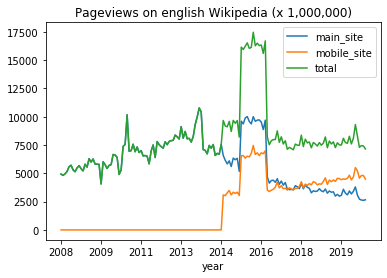

In [925]:
plot = df_plot_data.plot( x = 'year', title = 'Pageviews on english Wikipedia (x 1,000,000)')

Save the plot with the following incantation.

In [927]:
figure_1 = plot.get_figure()

In [928]:
figure_1.savefig('en_wikipedia_traffic.png')